In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading in data
mitbih_train_df = pd.read_csv("../data/mitbih/mitbih_train.csv", header=None)
mitbih_test_df = pd.read_csv("../data/mitbih/mitbih_test.csv", header=None)

In [3]:
mitbih_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
mitbih_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Looking at the different classes

In [7]:
samples = mitbih_train_df.groupby(187, group_keys=False).apply(lambda mitbih_train_df: mitbih_train_df.sample(1))
samples

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
9637,0.928058,0.730216,0.179856,0.053957,0.118705,0.118705,0.071942,0.046763,0.050360,0.053957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73404,0.968220,0.942797,0.451271,0.065678,0.038136,0.076271,0.091102,0.086864,0.080508,0.084746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75791,0.834369,0.900621,0.842650,0.776398,0.724638,0.699793,0.716356,0.699793,0.492754,0.265010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
80981,1.000000,0.717949,0.390649,0.140271,0.090498,0.158371,0.144796,0.128205,0.117647,0.107089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
85126,1.000000,0.501859,0.513011,0.535316,0.539033,0.520446,0.513011,0.531599,0.509294,0.405204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


Text(0.5, 1.0, 'Ventric. beats')

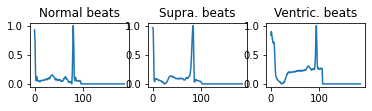

In [16]:
plt.subplot(3,3,1)
plt.plot(samples.iloc[0,:186])
plt.title('Normal beats')
plt.subplot(3,3,2)
plt.plot(samples.iloc[1,:186])
plt.title('Supra. beats')
plt.subplot(3,3,3)
plt.plot(samples.iloc[2,:186])
plt.title('Ventric. beats')
